In [4]:
import os
os.chdir('D://my project1')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics
import pickle


In [5]:
dataset=pd.read_csv('bike.csv')
dataset.describe()


,mileage,age,sell price
count,20.000000,20.000000,20.000000
mean,59736.500000,5.150000,24547.500000
std,20595.441825,1.785173,7511.000266
min,22500.000000,2.000000,12000.000000
25%,50500.000000,4.000000,19375.000000
50%,59000.000000,5.000000,24000.000000
75%,73750.000000,6.250000,29025.000000
max,91000.000000,8.000000,40000.000000


<AxesSubplot:xlabel='mileage'>

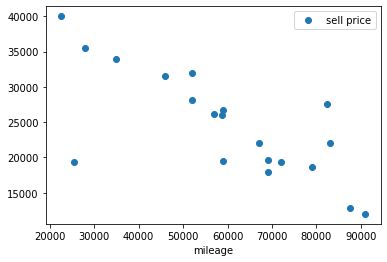

In [7]:

dataset.plot(x='mileage',y='sell price',style="o")

In [8]:
x=dataset[["mileage","age"]]
y=dataset.iloc[:,-1].values

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=8) 

In [10]:
regressor=LinearRegression() 
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
y_pred
df=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
df

,Actual,predicted
0,19300,21998.418184
1,18700,18827.059473


In [11]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(regressor.intercept_)
print(regressor.coef_)
print(regressor.score(x_train,y_train))
regressor.predict([[57000,5]])        

Mean Absolute Error: 1412.738828599835
Mean Squared Error: 3648802.4024396013
Root Mean Squared Error: 1910.1838661342529
41001.39009563294
[ 8.39345056e-04 -3.17723413e+03]
0.5601191536319171


array([25163.06213401])

In [12]:
pickle.dump(regressor, open('reg.pkl','wb'))

model1 = pickle.load(open('reg.pkl','rb'))
print(model1.predict([[185.9,102]]))


[-283076.33471804]
